<a href="https://colab.research.google.com/github/SarahFeanor/Portfolio-DataScience/blob/main/Detec%C3%A7%C3%A3o_de_fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<sub> 🔗[GitHub](https://github.com/SarahFeanor) | [LinkedIn](https://www.linkedin.com/in/sarahfrezende/) | [Portfólio](https://github.com/sarahfeanor/Portfolio-DataScience) | [Medium](https://medium.com/@sarahfrezende)  </sub>

📂 Projeto | Data Science | By Sarah Faria Rezende

---

# **Protegendo Transações Financeiras: Detecção de Fraudes em Cartões de Crédito**

O combate às fraudes em cartões de crédito constitui uma das principais preocupações para as instituições financeiras. Essas ocorrências podem acarretar prejuízos consideráveis tanto para os consumidores quanto para as próprias instituições, destacando-se como um desafio contínuo. A complexidade reside no fato de que os fraudadores estão em busca constante de métodos para contornar os sistemas de segurança.

Segundo dados da Serasa Experian, somente no Brasil, aproximadamente 12,1 milhões de pessoas foram alvo de algum tipo de fraude financeira no último ano. Isso resultou em um prejuízo de 1,8 bilhão de reais somente nos últimos 12 meses.

A tarefa de detectar fraudes em transações de cartões de crédito é intrincada. Transações legítimas e fraudulentas podem ser semelhantes, o que complica o processo de diferenciação. Além disso, as fraudes podem ocorrer em diferentes faixas de valores e locais, dificultando a identificação de um padrão. Esse cenário pode levar a erros de detecção, incluindo tanto falsos positivos (blocos preventivos em transações legítimas) quanto falsos negativos (não identificação de transações fraudulentas).

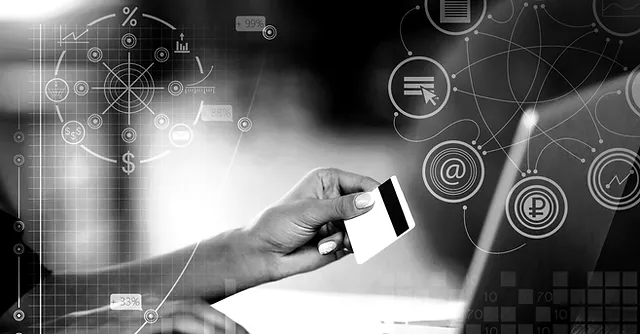

# **Objetivo do Projeto**

O propósito deste projeto é conduzir uma análise exploratória dos dados referentes a transações de cartões de crédito, bem como desenvolver modelos de machine learning que tenham a capacidade de identificar transações fraudulentas com elevada precisão. Para alcançar esse objetivo, serão empregadas técnicas avançadas de análise de dados e machine learning, com a finalidade de identificar padrões e anomalias nos dados. Adicionalmente, serão aplicadas abordagens de balanceamento de dados. Uma parte crucial do processo consistirá em avaliar a eficácia dos modelos construídos, tanto em termos de sua precisão na detecção de fraudes quanto em relação à minimização de falsos positivos.

# **Importação dos Dados**

Os dados utilizados neste projeto provêm de diversas empresas de cartões de crédito na Europa. O conjunto de dados abrange transações financeiras que ocorreram durante um intervalo de dois dias, incluindo 492 casos de fraudes em meio a quase 290 mil transações. É importante observar que o conjunto de dados é altamente desbalanceado, com as fraudes representando somente 0,17% do total.

Outro ponto a se destacar é que as características do conjunto de dados são todas numéricas e foram submetidas a um processo de descaracterização para salvaguardar questões de privacidade e segurança. Por consequência, as colunas são denotadas por meio de nomenclaturas como v1, v2, v3, ..., v28.

In [2]:
# importar os pacotes necessários

import os
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import tree
from sklearn.cluster import KMeans
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [3]:
pip install scikit-plot

In [4]:
import scikitplot as skplt

In [5]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

# Análise dos Dados

O objetivo desta etapa é adquirir uma compreensão da estrutura dos dados.

## Dicionário das Variáveis

- **`Time`:** Representa o número de segundos decorridos entre a primeira transação e a transação atual.
- **`V1, V2, ..., V28`:** São colunas numéricas anônimas que contêm características transformadas por meio de PCA (Análise de Componentes Principais). Devido a questões de privacidade, o significado exato dessas características não pode ser revelado.
- **`Amount`:** Indica o valor da transação.
- **`Class:`** É a coluna de destino, assumindo o valor 0 para transações normais e 1 para transações fraudulentas.

# Análise Exploratória dos Dados

Nesta etapa de análise exploratória dos dados, vamos abordar os seguintes pontos:

- Compreensão geral das variáveis.
- Percentual de valores ausentes.
- Equilíbrio do conjunto de dados.
- Análise do intervalo de tempo entre as transações.
- Análise dos valores das transações.
- Relação entre o tempo e o valor das transações.

Para iniciar, vamos examinar as cinco primeiras entradas no conjunto de dados, a fim de obter uma visão inicial da estrutura dos dados.

In [6]:
# Ver as 5 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Visualizar o tamanho do dataframe
print("Entradas: ", df.shape[0])
print("Variáveis: ", df.shape[1])

Entradas:  284807
Variáveis:  31


In [8]:
# Extrair o nome das colunas
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
# Extrair o tipo das variáveis
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
# Porcentagem de itens nulos
(df.isnull().sum()/df.shape[0]).sort_values(ascending = True) * 100

Time      0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V16       0.0
Amount    0.0
V15       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
V1        0.0
V14       0.0
Class     0.0
dtype: float64

Podemos perceber que não existem valores nulos em nenhuma das variáveis, o que é uma característica positiva para a análise. No entanto, as variáveis Amount e Time estão em ordens de grandeza diferentes, o que significa que será necessário realizar a padronização delas. A seguir, plotaremos um gráfico de barras para verificar o balanceamento do conjunto de dados.

In [11]:
# Quantidade de dados distribuidos por classes
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
# Porcentagem de dados distribuidos por classes
round(df.Class.value_counts()/df.shape[0] * 100,4)

0    99.8273
1     0.1727
Name: Class, dtype: float64

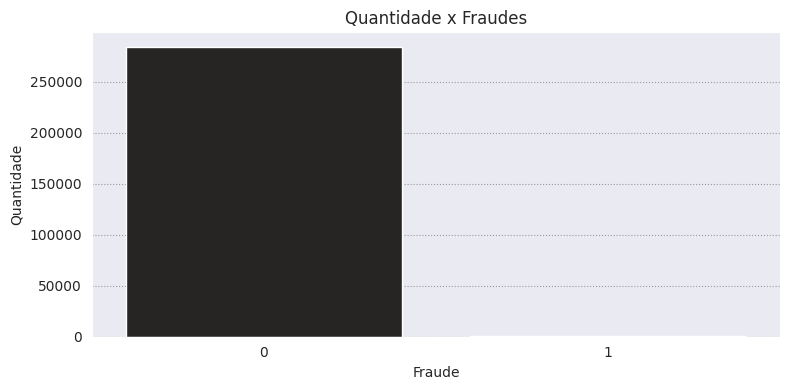

In [14]:
# Plotar um gráfico de barras para ver o balanceamento do *dataset*
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette(sns.dark_palette("xkcd:golden", 8))
count = df['Class'].value_counts()
sns.countplot(x='Class', data=df)
ax.set_xlabel('Fraude')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade x Fraudes');
plt.tight_layout()


O dataset apresenta um alto grau de desbalanceamento, com apenas 0,172% das transações sendo classificadas como fraudulentas. Esse desbalanceamento pode resultar em um viés no modelo, favorecendo a classe majoritária. Dado o escopo do problema, é crítico identificar corretamente as transações normais, mas também é crucial detectar as fraudes para evitar grandes prejuízos. Portanto, é essencial realizar um balanceamento adequado para construir um modelo eficaz para essa situação.

A seguir, é apresentado um histograma para a variável 'Time' quando há fraudes e quando não há. Nota-se um pico significativo em torno de 100.000 segundos para as transações fraudulentas, o que contrasta com as transações normais, onde esse valor é muito menor.

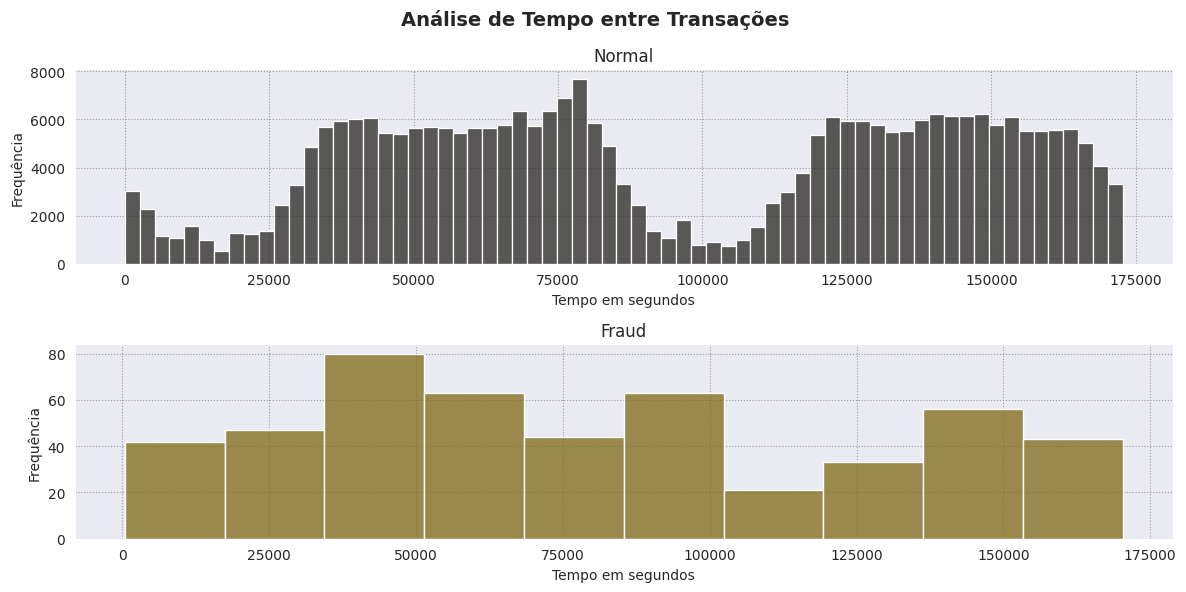

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette(sns.dark_palette("xkcd:golden", 8))
sns.histplot(data=df.Time.loc[df.Class == 0], kde=False, ax = ax[0], color=sns.color_palette()[0])
sns.histplot(data=df.Time.loc[df.Class == 1], kde=False, ax = ax[1], color=sns.color_palette()[3])
ax[0].set_xlabel('Tempo em segundos')
ax[0].set_ylabel('Frequência')
ax[0].set_title('Normal');

ax[1].set_xlabel('Tempo em segundos')
ax[1].set_ylabel('Frequência')
ax[1].set_title('Fraud');

fig.suptitle("Análise de Tempo entre Transações", fontsize=14, fontweight='bold')
plt.tight_layout()

A seguir, apresentamos uma análise estatística da variável 'Time' em situações onde não há fraudes e quando há fraudes. É possível notar que nos casos de fraude, tanto a média quanto a mediana da variável 'Time' são menores, sugerindo um intervalo de tempo menor entre transações fraudulentas. No entanto, no contexto geral, as diferenças são sutis e podem não ser significativas.

In [16]:
# Não há fraudes
df.Time.loc[df.Class == 0].describe()

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

In [17]:
# Há fraudes
df.Time.loc[df.Class == 1].describe()

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

A seguir, apresentamos um histograma da variável 'Amount' quando se trata de transações normais e transações fraudulentas. Os resultados indicam que transações normais tendem a ter valores mais elevados, com uma média de 88,29 e mediana de 22,00, enquanto as transações fraudulentas tendem a ter valores menores, com média de 122,21 e mediana de 9,25.

Além disso, é notável que a amplitude de valores nas transações normais é muito maior do que nas transações fraudulentas. O valor máximo observado nas transações normais foi de 25.691,16, enquanto nas transações fraudulentas foi de 2.125,87.

Esses resultados sugerem que, de maneira geral, as transações fraudulentas têm valores mais baixos do que as transações normais. Essa tendência pode ser explicada pelo fato de que as transações fraudulentas frequentemente ocorrem de maneira indiscriminada, buscando obter lucros menores, porém em maior quantidade. Por outro lado, as transações normais geralmente têm valores mais altos e são realizadas de forma mais seletiva, com objetivos específicos.

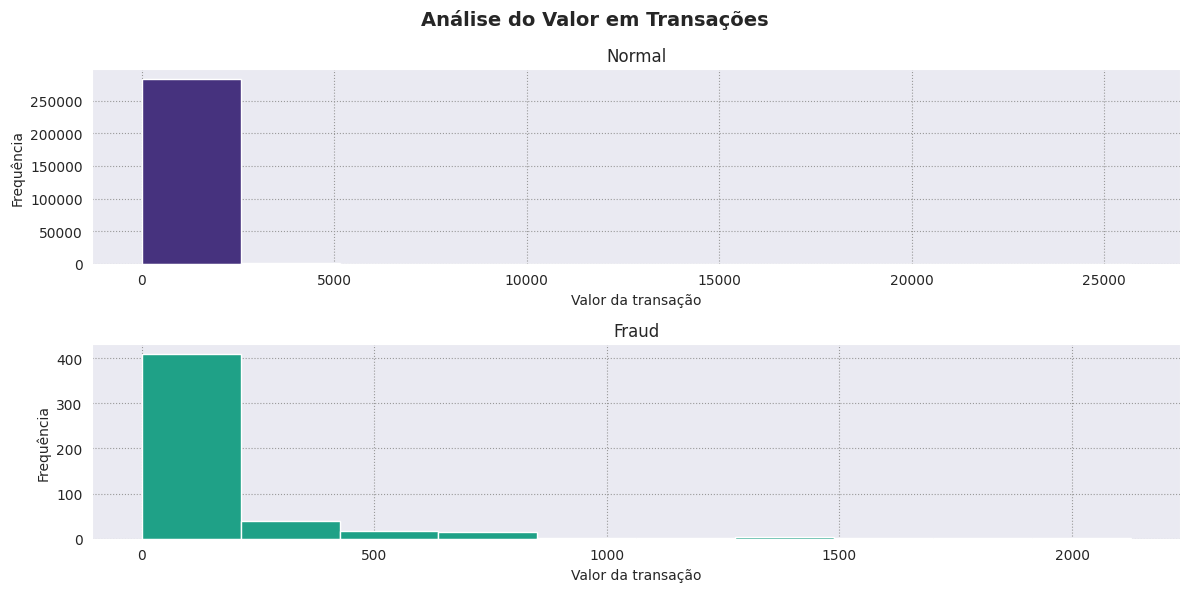

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

ax[0].hist(df.Amount[df.Class == 0], color=sns.color_palette("viridis")[0])
ax[0].set_title('Normal')

ax[1].hist(df.Amount[df.Class == 1], color=sns.color_palette("viridis")[3])
ax[1].set_title('Fraud')

ax[0].set_xlabel('Valor da transação')
ax[0].set_ylabel('Frequência')

ax[1].set_xlabel('Valor da transação')
ax[1].set_ylabel('Frequência')

fig.suptitle("Análise do Valor em Transações", fontsize=14, fontweight='bold')
plt.tight_layout()


In [20]:
# Não há fraudes
df.Amount[df.Class == 0].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [21]:
# Há fraudes
df.Amount[df.Class == 1].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Pode-se observar essa distribuição por meio do boxplot apresentado abaixo.



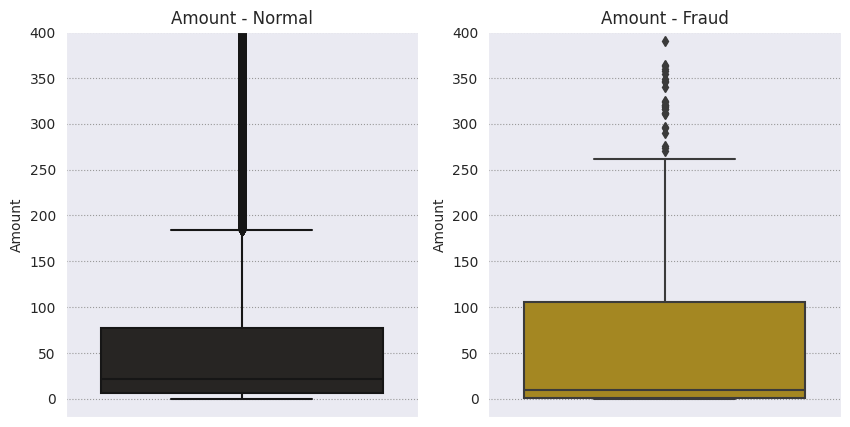

In [25]:
# verificar o conjunto de dados original
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette(sns.dark_palette("xkcd:golden", 8))
sns.boxplot(data=df.loc[df.Class == 0], y='Amount', ax=ax[0], color=sns.color_palette()[0])
sns.boxplot(data=df.loc[df.Class == 1], y='Amount', ax=ax[1], color=sns.color_palette()[5])
ax[0].set_title('Amount - Normal')
ax[1].set_title('Amount - Fraud')
ax[0].set_ylim(-20, 400)
ax[1].set_ylim(-20, 400)
plt.show()


Nas visualizações anteriores, é evidente a presença de discrepâncias significativas entre algumas variáveis, sugerindo a possibilidade de presença de outliers. Outliers não são necessariamente valores inválidos, uma vez que podem representar transações legítimas ou fraudulentas. No entanto, para uma análise mais profunda, será necessário preparar os dados.

A seguir, vamos examinar se as variáveis "Time" e "Amount" possuem alguma correlação entre si, usando tanto um gráfico de dispersão quanto uma matriz de correlação. Isso nos permitirá entender melhor as relações entre essas variáveis.


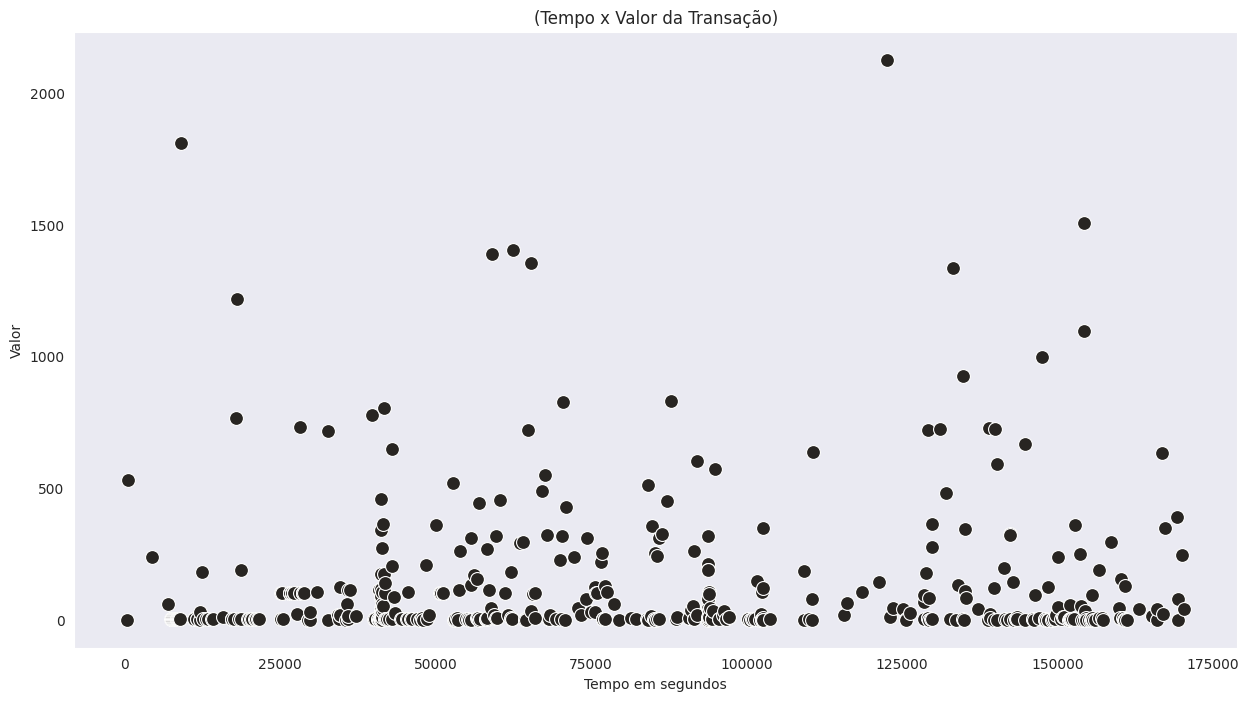

In [26]:
fig = plt.gcf()

fig.set_size_inches(15, 8)

ax = sns.scatterplot(data=df.loc[df.Class == 1], x="Time", y="Amount", s = 100)
ax.set(xlabel='Tempo em segundos', ylabel='Valor')
ax.set_title("(Tempo x Valor da Transação)")
ax.grid(False)

plt.show()

In [27]:
# criar uma matriz de correlação
corr_df = df[['Time', 'Amount']].corr(method='pearson');

# mostrar a matriz de correlação
display(corr_df);

,Time,Amount
Time,1.000000,-0.010596
Amount,-0.010596,1.000000


Correlação muito fraca (-0.010), indicando uma relação insignificante entre as variáveis.

Para resumir:

- Não há valores nulos no dataframe.
- As variáveis "Time" e "Amount" não estão padronizadas.
- Os dados estão altamente desbalanceados.
- Transações normais tendem a ter valores maiores.

**Pré-processamento dos Dados**

**Divisão do Conjunto de Dados**

Antes de realizar a padronização dos dados, é importante separar o conjunto de teste que será utilizado para validar a eficácia do modelo. Isso é crucial para evitar problemas como underfitting (baixo desempenho em treinamento e validação) e overfitting (modelo se ajusta excessivamente aos dados de treinamento e não generaliza bem para novos dados). Separar os dados antes da padronização é fundamental para que o conjunto de teste não entre em contato com os conjuntos de treinamento e validação, simulando uma situação do mundo real.

Existem várias abordagens para dividir os dados de forma a evitar esses problemas. Neste caso, optaremos por uma proporção de 70/15/15 para o conjunto de treinamento, validação e teste, respectivamente.

**Separando o conjunto de teste:**

In [28]:
# criando o conjunto de teste
test = df.sample(frac=0.15, random_state=0)

# verificando o conjunto
print(test.shape)
test.head()

(42721, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00,0
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98,0
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00,0
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,...,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00,0
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,...,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00,0


In [29]:
# drop das linhas de teste
df = df.drop(test.index)

# verificando o shape do df
df.shape

(242086, 31)

In [30]:
# resetando o index dos conjuntos
df.reset_index()
test.reset_index()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,...,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00,0
1,255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,...,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98,0
2,244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00,0
3,63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,...,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00,0
4,11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,...,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42716,229333,145885.0,-0.330429,0.587057,0.635175,-0.619929,0.690199,-1.146289,0.914373,-0.158436,...,-0.172181,-0.540837,0.047329,-0.037745,-0.671478,0.119750,0.094611,0.173363,1.29,0
42717,189242,128317.0,-17.015895,-18.501723,-2.965763,5.989228,7.811563,-4.440128,-1.905238,-1.938201,...,-5.414098,3.688960,11.360879,0.771200,2.274458,1.954516,6.507171,-4.075417,6.37,0
42718,232656,147253.0,0.044490,0.898231,0.306854,-0.587229,0.441139,-1.121860,1.039291,-0.231897,...,-0.255365,-0.535225,0.064659,0.050984,-0.476387,0.136342,0.250095,0.098383,2.69,0
42719,174418,121905.0,1.945191,-0.273317,-0.126410,0.436141,-0.841361,-1.026928,-0.323962,-0.216008,...,-0.211303,-0.481833,0.466048,0.482353,-0.668233,0.198535,-0.033724,-0.033819,23.99,0


**Padronização das Variáveis "Time" e "Amount"**

O objetivo do pré-processamento de dados é assegurar que as características (features) estejam na mesma escala, visando melhorar o desempenho dos algoritmos de machine learning. Nesse sentido, iremos padronizar as variáveis "Time" e "Amount" utilizando o StandardScaler. Esse processo ajusta os dados de forma a centralizá-los em uma média de zero e um desvio padrão de um, garantindo que as variáveis estejam em uma escala comparável.

In [31]:
# padronizar as colunas Time e Amount
df_clean = df.copy()
std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))
df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


Após a separação do conjunto de teste, e com os dados de "Time" e "Amount" devidamente padronizados, procederemos à criação do conjunto de treinamento e validação. Esses conjuntos serão utilizados para treinar os modelos e ajustar seus hiperparâmetros. O conjunto de teste, que foi previamente separado, permanecerá isolado até a etapa final de avaliação do modelo. Essa abordagem ajuda a simular uma situação mais realista, em que o modelo é avaliado com dados não vistos anteriormente.

### **Conjunto de Treinamento e Validação**


In [32]:
# separar variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df_clean['Class'] # variável alvo

# dividir o dataset entre treino e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size = 0.15)

**Tratamento do Desbalanceamento de Dados**

Quando um conjunto de dados possui mais de 50% das observações em uma classe e muito menos na outra, ele é considerado desbalanceado. Muitos algoritmos de aprendizado de máquina performam bem em conjuntos de dados equilibrados, pois buscam otimizar a precisão global da classificação ou métricas relacionadas. Em dados desbalanceados, os limites de decisão estabelecidos pelos algoritmos tendem a favorecer a classe majoritária, levando à classificação incorreta da classe minoritária.

No contexto aqui apresentado, é preferível ter falsos positivos a falsos negativos, já que instituições financeiras enfrentam mais prejuízos com transações indevidas não detectadas do que bloqueios preventivos de transações legítimas. Para abordar esse problema, é necessário utilizar métricas que deem mais peso a essa preocupação e adotar estratégias para lidar com o desbalanceamento dos dados. Uma das abordagens é o uso de técnicas de amostragem, que se dividem em under-sampling e over-sampling.

O under-sampling envolve a remoção de exemplos da classe majoritária para equalizar a proporção entre as classes. Por outro lado, o over-sampling consiste em criar novos exemplos para a classe minoritária, aumentando sua representatividade no conjunto de dados.

Neste projeto, optaremos por aplicar a técnica ClusterCentroids para under-sampling e SMOTE para over-sampling, em conjunto com os algoritmos de machine learning Decision Tree e Logistic Regression.

**ClusterCentroids**

A técnica de ClusterCentroids é uma abordagem de under-sampling que envolve a divisão da classe majoritária em clusters e, em seguida, a seleção aleatória de exemplos de cada cluster até que o conjunto de dados esteja equilibrado. A premissa subjacente a essa técnica é que, se houver uma aglomeração de exemplos da classe majoritária próximos uns aos outros, é possível reduzir a quantidade de exemplos dessa classe, selecionando aleatoriamente algumas instâncias de cada cluster, sem perder informações cruciais do conjunto de dados original.

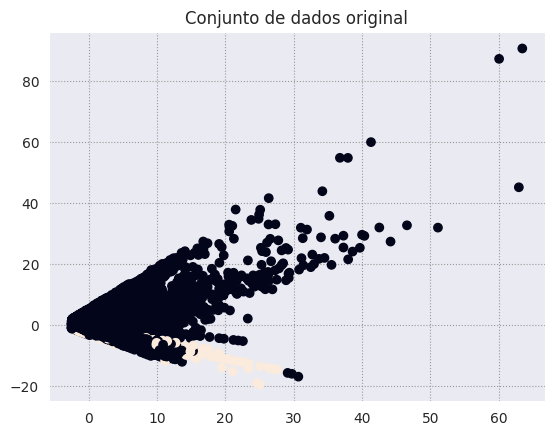

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


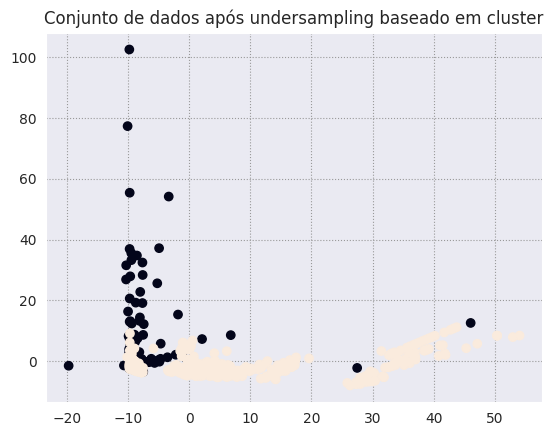

In [33]:
# Aplica a redução de dimensionalidade PCA para deixar o X_train em duas dimensões
pca = PCA(2)
X_train_vis = pca.fit_transform(X_train)

# Exibindo o conjunto de dados original
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train)
plt.title('Conjunto de dados original')
plt.show()

# Cria um objeto ClusterCentroids
cc = ClusterCentroids(sampling_strategy='auto', random_state=10)

# Aplica undersampling baseado em cluster
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

# Aplicando PCA para visualizar o conjunto de dados em 2 dimensões após o undersampling
X_resampled_vis = pca.fit_transform(X_resampled)

# Exibindo o conjunto de dados após o undersampling
plt.scatter(X_resampled_vis[:, 0], X_resampled_vis[:, 1], c=y_resampled)
plt.title('Conjunto de dados após undersampling baseado em cluster')
plt.show()

Ao empregar a técnica de under-sampling, foram removidas 205.063 amostras do conjunto de dados, resultando em um equilíbrio entre as classes.

In [34]:
# Visualizando o tamanho do conjunto de treinamento
print("Tamanho do y_train:", np.shape(y_train))

# Visualizando o tamanho do conjunto balanceado
print("Tamanho do y_resampled:", np.shape(y_resampled))

Tamanho do y_train: (205773,)
Tamanho do y_resampled: (710,)


In [35]:
# ver o balanceamento das classes
print(pd.Series(y_resampled).value_counts())

0    355
1    355
Name: Class, dtype: int64


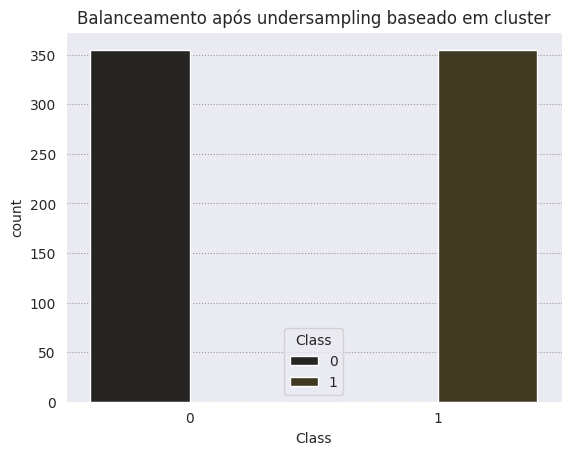

In [36]:
# plotar a nova distribuição de classes
sns.set_palette(sns.dark_palette("xkcd:golden", 8))
sns.countplot(x=y_resampled, hue=y_resampled);
plt.title('Balanceamento após undersampling baseado em cluster')
plt.show();

## SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) é uma técnica de over-sampling amplamente utilizada em problemas de classificação em que a classe minoritária é significativamente menor do que a classe majoritária. Essa técnica é útil porque muitos algoritmos de aprendizado de máquina são sensíveis ao desbalanceamento de classes e tendem a ter um desempenho pior quando a classe minoritária é sub-representada. A técnica funciona selecionando um exemplo da classe minoritária e encontrando os seus k vizinhos mais próximos. Em seguida, ela cria novos exemplos sintéticos interpolando aleatoriamente os atributos dos exemplos selecionados e adicionando-os ao conjunto de dados."

In [37]:
# Criando uma instância do SMOTE
smote = SMOTE()

# Balanceando os dados
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

Ao utilizar a técnica over-sampling 205063 foram criadas a fim de balancear o dataset.



In [38]:
# Visualizando o tamanho do conjunto de treinamento
print("Tamanho do y_train:", np.shape(y_train))

# Visualizando o tamanho do conjunto balanceado
print("Tamanho do y_resampled:", np.shape(y_resampled_smote))

Tamanho do y_train: (205773,)
Tamanho do y_resampled: (410836,)


In [39]:
# ver o balanceamento das classes
print(pd.Series(y_resampled_smote).value_counts())

0    205418
1    205418
Name: Class, dtype: int64


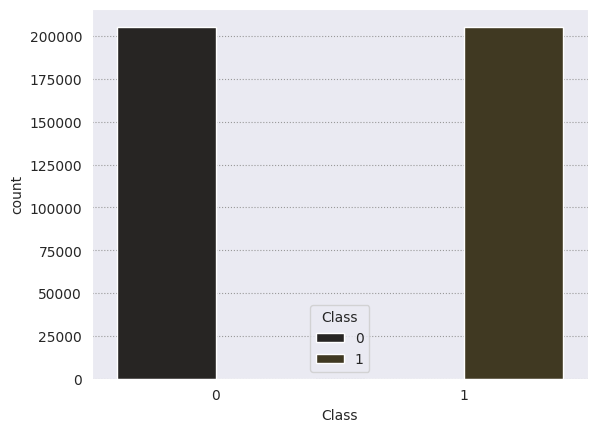

In [40]:
# plotar a nova distribuição de classes
sns.set_palette(sns.dark_palette("xkcd:golden", 8))
sns.countplot(x=y_resampled_smote, hue=y_resampled_smote);

### Treinamento dos Algoritmos de Machine Learning com Amostras Balanceadas

### Decision Tree

A **Árvore de Decisão** para classificação é um modelo de aprendizado de máquina que utiliza um conjunto de regras de decisão para atribuir uma instância a uma ou mais classes pré-definidas. Cada nó interno da árvore representa uma pergunta sobre uma característica dos dados de entrada, enquanto as folhas representam as classes de saída. Durante o treinamento, o algoritmo constrói a árvore ao fazer uma série de perguntas sucessivas para dividir o conjunto de treinamento em subconjuntos menores e, finalmente, classificar a instância na saída apropriada.

A seguir, realizaremos o treinamento da Árvore de Decisão utilizando o conjunto de dados balanceado por meio das técnicas de under-sampling e over-sampling.

### ClusterCentroids

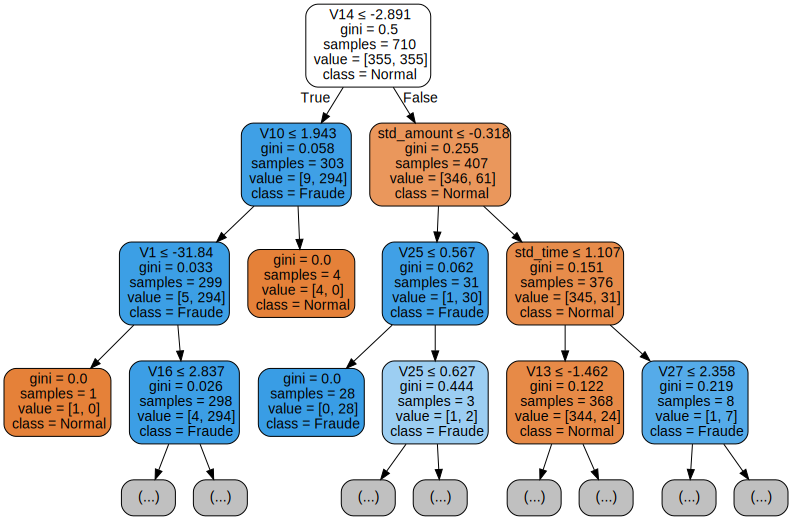

In [41]:
# Cria um objeto DecisionTreeClassifier, que retorna um Estimator
clf = tree.DecisionTreeClassifier()

# Realiza o aprendizado de máquina
clf = clf.fit(X_resampled, y_resampled)

# Definindo o caminho para o Graphviz
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

dot_data = export_graphviz(clf, out_file=None, feature_names=X_resampled.columns,
                           class_names=['Normal', 'Fraude'], filled=True, rounded=True,
                           max_depth = 3, special_characters=True)

# Criando um objeto Graph a partir do arquivo .dot
graph = graphviz.Source(dot_data)

# Exibindo a árvore de decisão no notebook
display(graph)

In [42]:
# fazer as previsões em cima dos dados de validação
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

SMOTE

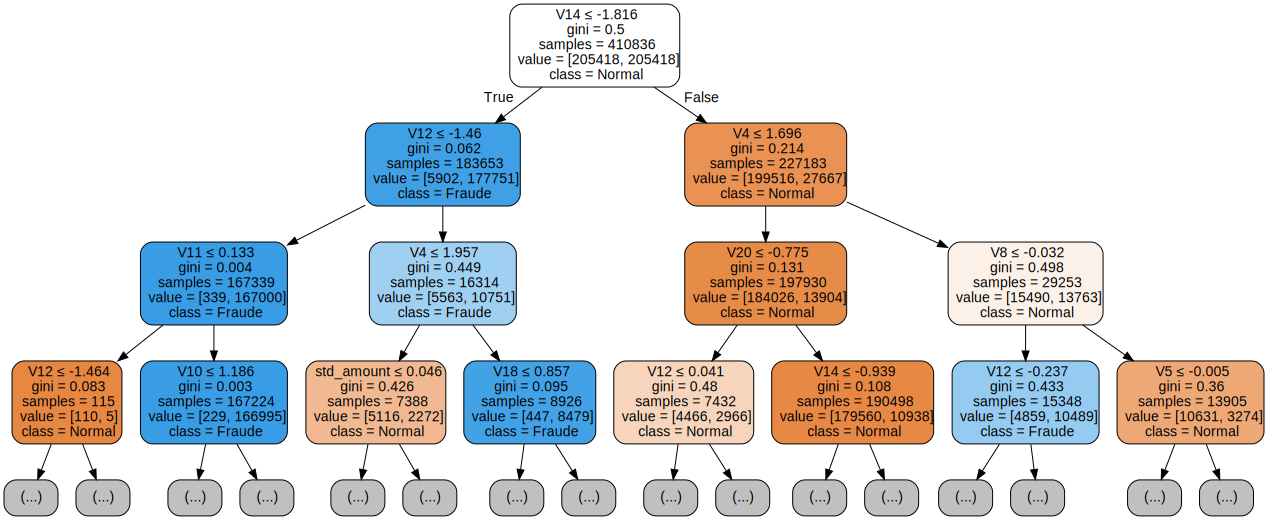

In [43]:
# Cria um objeto DecisionTreeClassifier, que retorna um Estimator
clf_smote = tree.DecisionTreeClassifier()

# Realiza o aprendizado de máquina
clf_smote = clf_smote.fit(X_resampled_smote, y_resampled_smote)

# Definindo o caminho para o Graphviz
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

dot_data = export_graphviz(clf_smote, out_file=None, feature_names=X_resampled_smote.columns,
                           class_names=['Normal', 'Fraude'], filled=True, rounded=True,
                           max_depth = 3, special_characters=True)

# Criando um objeto Graph a partir do arquivo .dot
graph = graphviz.Source(dot_data)

# Exibindo a árvore de decisão no notebook
display(graph)

In [44]:
# fazer as previsões em cima dos dados de validação
y_pred_smote = clf_smote.predict(X_test)
y_prob_smote = clf_smote.predict_proba(X_test)

### **Treinamento dos Algoritmos de Machine Learning com Amostras Balanceadas**

**Logistic Regression**

A **Regressão Logística** é um modelo estatístico empregado para problemas de classificação binária, nos quais o objetivo é prever a probabilidade de um exemplo pertencer a uma de duas classes possíveis (por exemplo, sim ou não, positivo ou negativo, verdadeiro ou falso). O modelo de regressão logística emprega a função logística para transformar uma variável de entrada linear em uma probabilidade. A função logística é uma curva sigmoide que gera valores entre 0 e 1. Essa probabilidade é então comparada com um limiar para determinar a qual classe o exemplo deve ser atribuído.

A seguir, realizaremos o treinamento da Regressão Logística utilizando o conjunto de dados balanceado por meio das técnicas de under-sampling e over-sampling.

### **ClusterCentroids**

In [45]:
# instanciar e treinar um modelo de Regressão Logística
np.random.seed(2)
model = LogisticRegression()
model.fit(X_resampled, y_resampled);

In [46]:
# fazer as previsões em cima dos dados de validação
y_pred_lr = model.predict(X_test)
y_proba_lr = model.predict_proba(X_test)

### SMOTE

In [47]:
# instanciar e treinar um modelo de Regressão Logística
np.random.seed(2)
model_smote = LogisticRegression()
model_smote.fit(X_resampled_smote, y_resampled_smote);

In [48]:
# fazer as previsões em cima dos dados de validação
y_pred_lr_smote = model_smote.predict(X_test)
y_proba_lr_smote = model_smote.predict_proba(X_test)

## Previsões no Conjunto de Validação

**Avaliação do Desempenho dos Modelos**

Para avaliar o desempenho dos modelos de classificação, utilizaremos diversas métricas que são comuns em tarefas de classificação. Essas métricas nos ajudarão a entender como os modelos estão se saindo na tarefa de distinguir entre as classes de interesse. As principais métricas que utilizaremos são:

**Matriz de Confusão:** Uma tabela que apresenta as previsões do modelo em comparação com as classes reais dos exemplos no conjunto de dados. Ela é composta por quatro elementos: Verdadeiro Positivo (VP), Falso Positivo (FP), Falso Negativo (FN) e Verdadeiro Negativo (VN).

**Precision (Precisão):** A proporção de verdadeiros positivos (VP) sobre todos os exemplos classificados como positivos (VP + FP). Em outras palavras, é a proporção de exemplos que o modelo classificou corretamente como positivos em relação a todos os exemplos classificados como positivos. Uma precisão de 1.0 significa que todos os exemplos classificados como positivos foram verdadeiros positivos.

**Recall (Revocação):** A proporção de verdadeiros positivos (VP) sobre todos os exemplos que realmente são positivos (VP + FN). É a proporção de exemplos positivos que o modelo classificou corretamente em relação a todos os exemplos positivos. Um recall de 1.0 significa que todos os exemplos positivos foram classificados corretamente como positivos.

**F1-score:** Uma média harmônica ponderada da precisão e do recall, onde a pontuação F1 alcança seu melhor valor em 1 e o pior em 0. Um F1-score de 1.0 significa que a precisão e o recall estão perfeitos.

**Support (Suporte):** O número de exemplos no conjunto de dados que pertencem àquela classe.

**Acurácia:** A proporção de exemplos classificados corretamente em relação ao número total de exemplos.

**AUC (Área sob a Curva):** Uma medida de desempenho usada em problemas de classificação binária. Representa a área sob a curva ROC (receiver operating characteristic), que é um gráfico que ilustra a relação entre a taxa de verdadeiros positivos e a taxa de falsos positivos para diferentes limiares de classificação. Um valor de AUC de 1.0 indica que o modelo é capaz de distinguir perfeitamente entre as duas classes.

Essas métricas nos fornecerão uma visão completa do quão bem os modelos estão se ajustando aos dados e desempenhando na tarefa de detecção de fraudes.

## Decision Tree
## Under-sampling

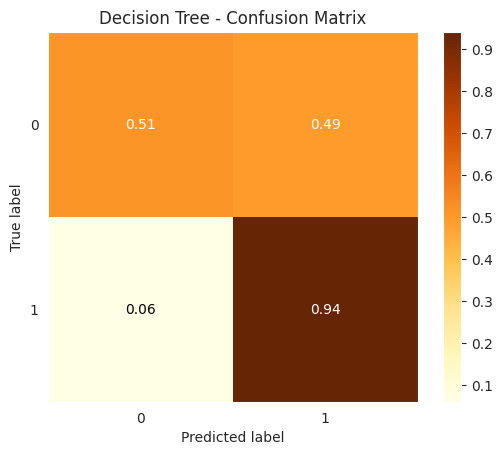

In [49]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, cmap = 'YlOrBr')
plt.title("Decision Tree - Confusion Matrix");

Com a matriz de confusão pode-se observar que o modelo teve um bom desempenho ao classificar fraudes, com 92% das fraudes preditas corretamente. Contudo, em transações normais o desempenho foi aquém do esperado, pois apenas 62% foram classificadas corretamente.

In [55]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.5078    0.6735     36250
           1     0.0033    0.9365    0.0066        63

    accuracy                         0.5085     36313
   macro avg     0.5015    0.7221    0.3400     36313
weighted avg     0.9981    0.5085    0.6723     36313

Acurácia: 0.5085

AUC: 0.7221



Neste tipo de problema, originalmente desbalanceado, a acurácia não é uma métrica adequada, mas obtivemos 61% de acerto geral. A área sob a curva ROC do modelo é de 0.76, o que indica que o modelo conseguiu distinguir razoavelmente bem entre as duas classes. Para a classe 1, o recall é alto, de 0.92, o que significa que o modelo identificou a grande maioria das fraudes, contudo para a classe 0 o valor é mediano, apenas 0.6180. Também é possível observar que a classe 0 teve 36250 exemplos, enquanto a classe 1 teve apenas 63 exemplos.

## Over-sampling

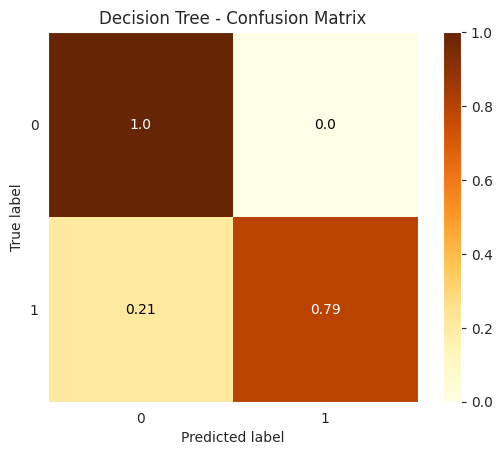

In [50]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_smote, normalize=True, cmap = 'YlOrBr')
plt.title("Decision Tree - Confusion Matrix");

In [51]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_smote, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_smote)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_smote)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9996    0.9976    0.9986     36250
           1     0.3676    0.7937    0.5025        63

    accuracy                         0.9973     36313
   macro avg     0.6836    0.8956    0.7506     36313
weighted avg     0.9985    0.9973    0.9978     36313

Acurácia: 0.9973

AUC: 0.8956



A combinação de over-sampling com Decision Tree retornou um AUC maior, cerca de 0.85, o que representação melhor distinção entre classes. Contudo, a classificação de transações fraudulentas foi menor, representando 71%. O desempenho de transações normais foi muito alto, 100% foi classificado corretamente.

## Logistic Regression
## Under-sampling

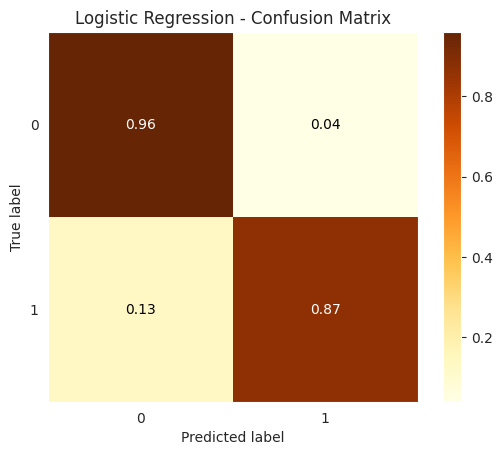

In [56]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lr, normalize=True, cmap = 'YlOrBr')
plt.title("Logistic Regression - Confusion Matrix");

In [57]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_lr, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_lr)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_lr)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9640    0.9815     36250
           1     0.0404    0.8730    0.0772        63

    accuracy                         0.9638     36313
   macro avg     0.5201    0.9185    0.5294     36313
weighted avg     0.9981    0.9638    0.9800     36313

Acurácia: 0.9638

AUC: 0.9185



De modo geral, o modelo possuiu um ótimo desempenho. O AUC está em 0.96, o que indica que foi possível distinguir bem entre as duas classes. 90% das fraudes foram classificadas corretamente, bem como 97% das transações normais.

### Over-sampling

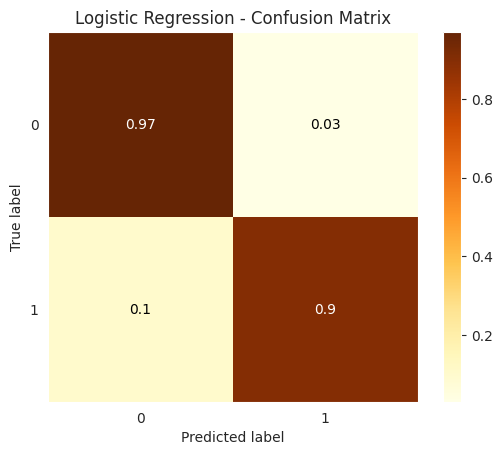

In [58]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lr_smote, normalize=True, cmap = 'YlOrBr')
plt.title("Logistic Regression - Confusion Matrix");

In [59]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_lr_smote, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_lr_smote)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_lr_smote)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9746    0.9871     36250
           1     0.0583    0.9048    0.1095        63

    accuracy                         0.9745     36313
   macro avg     0.5291    0.9397    0.5483     36313
weighted avg     0.9982    0.9745    0.9855     36313

Acurácia: 0.9745

AUC: 0.9397



Over-sampling e Logistic Regression trouxe um resultado semelhante ao under-sampling e Logistic Regression. Os dois modelos tiveram ótimo desempenho, com AUC em torno de 0.93. Ambos obtiveram recall na classe 0 de aproximadamente 0.97, e 0.90 na classe 1.

## Avaliação do Modelo Utilizando os Dados de Teste
No começo do projeto, realizamos um split nos dados para que tivéssemos 3 conjuntos: Um de treino, um de validação e um de teste. Agora que já exploramos e preparamos os dados, instaciamos o modelo e fizemos previsões no conjunto de validação, é hora de descobrirmos o potencial desse simples modelo com os dados de teste.

### Padronização no conjunto de teste

In [52]:
# padronizar as colunas Time e Amount
std_scaler = StandardScaler()
test['std_amount'] = std_scaler.fit_transform(test['Amount'].values.reshape(-1, 1))
test['std_time'] = std_scaler.fit_transform(test['Time'].values.reshape(-1, 1))
test.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


### Separação entre variáveis e classe alvo

In [60]:
# separar variáveis entre X e y
X_test = test.drop('Class', axis=1)
y_test = test['Class']

## Balanceamento de dados

In [53]:
# tamanho dos dados de teste
test.shape

(42721, 31)

In [54]:
# balanceamento dos dados de teste
test.Class.value_counts()

0    42647
1       74
Name: Class, dtype: int64

**Decision Tree - Under-sampling e Over-sampling: Comparação de Desempenho**

Ao analisar o desempenho do modelo Decision Tree utilizando as técnicas de under-sampling e over-sampling, podemos observar algumas tendências interessantes. No geral, notamos um desempenho mais favorável no conjunto de teste em comparação ao conjunto de validação, embora os resultados ainda sejam bastante semelhantes entre eles.

No caso do balanceamento realizado com under-sampling, o modelo obteve um recall de 0.92 para a classe minoritária (fraudes) e 0.83 para a classe majoritária. O valor de AUC ficou em torno de 0.93. Em contraste, no conjunto de validação, os resultados foram de 0.92 para recall da classe minoritária, 0.62 para recall da classe majoritária e 0.76 para AUC.

Já no cenário de over-sampling, o modelo apresentou um recall de 0.81 para a classe majoritária e um impressionante recall de 1 para a classe minoritária. Esses resultados são consistentes com os obtidos no conjunto de validação (0.71 para recall da classe majoritária e 1 para a classe minoritária). Além disso, o valor de AUC aumentou significativamente, de 0.85 para 0.92, indicando uma melhoria na capacidade discriminativa do modelo.

Essa comparação demonstra que o over-sampling teve um impacto positivo no desempenho do modelo Decision Tree, especialmente em relação à identificação de fraudes. No entanto, é importante considerar também a precisão na classificação de transações normais para evitar falsos positivos.



In [61]:
# Under-sampling
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

# Over-sampling
y_pred_smote = clf_smote.predict(X_test)
y_prob_smote = clf_smote.predict_proba(X_test)

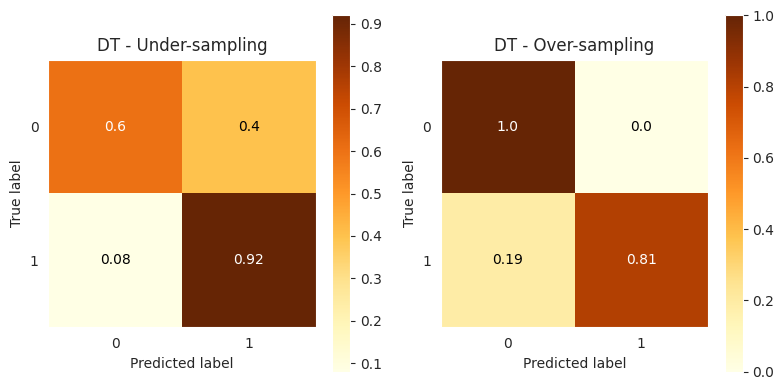

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, cmap = 'YlOrBr', ax = ax[0])
skplt.metrics.plot_confusion_matrix(y_test, y_pred_smote, normalize=True, cmap = 'YlOrBr', ax = ax[1])

ax[0].set_title("DT - Under-sampling")
ax[1].set_title("DT - Over-sampling")

plt.tight_layout();

### Logistic Regression - Under-sampling e Over-sampling
No caso da Logistic Regression utilizando under-sampling, foram obtidas métricas semelhantes às anteriores, com exceção do AUC, que apresentou um aumento de 0,93 para 0,95, e o recall da classe minoritária que aumentou de 0.9 para 0.95. Semelhantemente, no caso do over-sampling, houve um aumento significativo no recall da classe minoritária, de 0,91 para 0,95, e no AUC, e na classe majoritária de 0.97 para 0.98.

Em geral, todos os modelos utilizando a regressão logística apresentaram um bom desempenho, com AUC acima de 0,9 e recall elevado para a classe minoritária, o que indica que o modelo é capaz de detectar com precisão as transações fraudulentas.

In [67]:
# fazer as previsões em cima dos dados de teste
y_pred_lr = model.predict(X_test)
y_proba_lr = model.predict_proba(X_test)

# fazer as previsões em cima dos dados de teste
y_pred_lr_smote = model_smote.predict(X_test)
y_proba_lr_smote = model_smote.predict_proba(X_test)

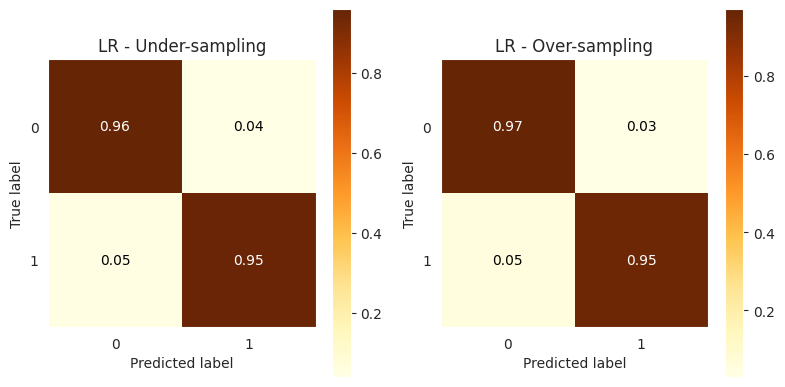

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lr, normalize=True, cmap = 'YlOrBr', ax = ax[0])
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lr_smote, normalize=True, cmap = 'YlOrBr', ax = ax[1])

ax[0].set_title("LR - Under-sampling")
ax[1].set_title("LR - Over-sampling")

plt.tight_layout();

In [69]:
# imprimir a área sob da curva
print("AUC LR - Under-sampling: {:.4f}\n".format(roc_auc_score(y_test, y_pred_lr)))
print("AUC LR - Over-sampling: {:.4f}\n".format(roc_auc_score(y_test, y_pred_lr_smote)))

AUC LR - Under-sampling: 0.9554

AUC LR - Over-sampling: 0.9602



## **Conclusão**

Com base nas análises meticulosas realizadas, fica evidente que a seleção criteriosa do modelo de classificação e a escolha sensata da técnica de balanceamento de classes desempenham um papel fundamental no sucesso da detecção de fraudes em transações financeiras. Ao considerar dois tipos de técnicas de balanceamento de classes (under-sampling e over-sampling) em conjunto com dois modelos de classificação (Decision Tree e Logistic Regression), podemos tirar valiosas lições.

A Regressão Logística emergiu como uma opção de destaque para resolver esse desafio, apresentando um desempenho superior em relação à Decision Tree. Especificamente, os modelos baseados em Regressão Logística alcançaram valores de AUC próximos a 0,93, destacando a capacidade de distinguir entre transações legítimas e fraudulentas de maneira eficaz.

As técnicas de balanceamento de classes, especialmente o under-sampling, revelaram-se estratégias eficazes para aprimorar o desempenho dos modelos. Observou-se que o modelo usando under-sampling e Regressão Logística obteve um recall consistente para a classe minoritária (fraudes), tanto nos conjuntos de validação como de treinamento. Isso indica que essa combinação é uma abordagem robusta e eficiente para enfrentar o desafio de detecção de fraudes.

Por outro lado, o modelo Decision Tree não conseguiu alcançar os mesmos níveis de desempenho que os modelos de Regressão Logística em termos de AUC e recall. Esse modelo registrou valores de AUC em torno de 0,76 e 0,85 (para under-sampling e over-sampling, respectivamente) na validação, com recall de apenas 0,71 para a classe minoritária com over-sampling. No entanto, é notável que, nos dados de teste, ambos os modelos alcançaram um desempenho mais sólido, atingindo valores de recall de 0,92 e 0,81 para a classe minoritária.

Em síntese, esta análise detalhada reforça a importância crítica da seleção cuidadosa do modelo de classificação e da técnica de balanceamento de classes no contexto da detecção de fraudes em transações financeiras. A Regressão Logística se destaca como uma escolha promissora, e o emprego adequado de estratégias de balanceamento pode ser decisivo para otimizar o desempenho do modelo na detecção de fraudes, contribuindo para a segurança e integridade das operações financeiras.